COVID-19 Tweet Analysis (NLP Project)

In [109]:
import pandas as pd

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
import warnings
warnings.filterwarnings('ignore')

In [112]:
#Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/covid19_tweets.csv")

In [113]:
#Preview
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


Actions to be performed on this Dataset:
*   Text Preprocessing
*   Sentiment Analysis
*   Keyword Extraction
*   Entity Extraction

In [114]:
#check all the features
df.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [115]:
#datatypes
df.dtypes

user_name           object
user_location       object
user_description    object
user_created        object
user_followers       int64
user_friends         int64
user_favourites      int64
user_verified         bool
date                object
text                object
hashtags            object
source              object
is_retweet            bool
dtype: object

In [116]:
#Source Column
df['source'].unique()


array(['Twitter for iPhone', 'Twitter for Android', 'Twitter Web App',
       'Buffer', 'TweetDeck', 'Twitter for iPad', 'Africa Newsroom',
       'Blood Donors India', 'TweetCaster for Android',
       'Alexander Higgins', 'IFTTT', 'Hootsuite Inc.', 'Sprout Social',
       'Sprinklr', 'assarofficial', 'IAMBLOG2TWITTER', 'CrowdControlHQ',
       'COVID19-Updates', 'EveryoneSocial', 'Dynamic Signal', 'Instagram',
       'TweetCaster for iOS', 'GlobalPandemic.NET', 'Venrap Radio',
       'HeyOrca', 'Twitter for Advertisers', 'Paper.li',
       'Twitter Media Studio', 'Twitter for Mac', 'dlvr.it',
       'Cheap Bots, Done Quick!', 'Prof. Shanku', 'LaterMedia',
       'SEMrush Social Media Tool', 'Twitterrific for iOS',
       "Sebastian's Twitter Bot", 'Threader_client', 'COVID19FactoidBot',
       'PwC UK SMART', 'tweet pro stiff', 'UK COVID-19 Alerts',
       'Resistbot Open Letters', 'preprint-alert', 'ContentStudio.io',
       'Peeping Moon', 'TweetAutomaticos', 'Orlo', 'AgoraPulse Ma

In [117]:
df['source'].value_counts()

Twitter Web App              56891
Twitter for Android          40179
Twitter for iPhone           35472
TweetDeck                     8543
Hootsuite Inc.                7321
                             ...  
DataBlogger                      1
Dear_Assistant                   1
OnlyPultCom                      1
Washington Square Parkerz        1
Radiology: AI app                1
Name: source, Length: 610, dtype: int64

From the above statistics we can clearly see that the majority of the tweets are from Twitter Web Application.

In [118]:
#Display the top thirty sources
df['source'].value_counts().nlargest(30)

Twitter Web App            56891
Twitter for Android        40179
Twitter for iPhone         35472
TweetDeck                   8543
Hootsuite Inc.              7321
Twitter for iPad            4336
Buffer                      2728
Sprout Social               1833
Instagram                   1759
IFTTT                       1545
dlvr.it                      681
GlobalPandemic.NET           679
LinkedIn                     628
COVID19-Updates              625
Twitter Media Studio         596
WordPress.com                537
HubSpot                      513
Sprinklr                     497
FS Poster                    414
Dynamic Signal               391
Resistbot Open Letters       390
Cheap Bots, Done Quick!      335
Paper.li                     322
Twitter for Advertisers      317
Blood Donors India           281
IAMBLOG2TWITTER              266
Alexander Higgins            225
Zoho Social                  224
The Social Jukebox           216
Fabrik.fm                    209
Name: sour

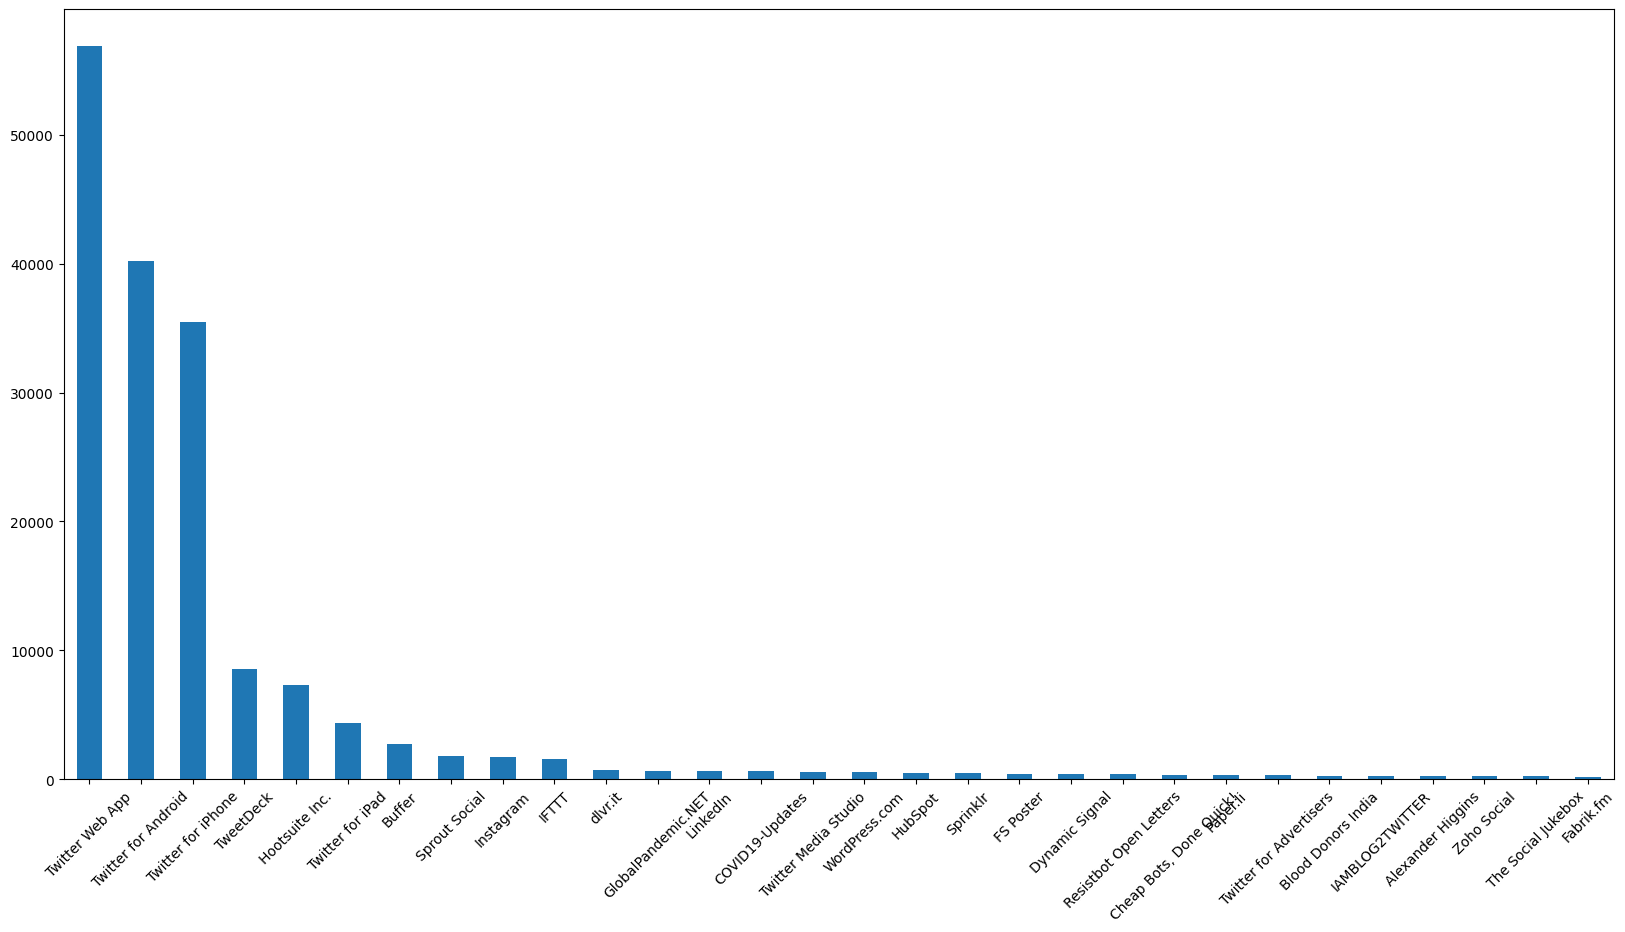

In [119]:
#Plot the top thirty sources
plt.figure(figsize=(20,10))
df['source'].value_counts().nlargest(30).plot(kind = 'bar')
plt.xticks(rotation=45)
plt.show()

**Text Analysis**

In [120]:
!pip install neattext

In [121]:
import neattext.functions as nfx

In [122]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [123]:
df['text'].iloc[2]

'@diane3443 @wdunlap @realDonaldTrump Trump never once claimed #COVID19 was a hoax. We all claim that this effort to… https://t.co/Jkk8vHWHb3'

Removing
*   mentions/userhandles
*   hashtags
*   urls
*   emojis
*   special characters





In [124]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [125]:
df['text'].apply(nfx.extract_hashtags)

0                                      []
1                                      []
2                              [#COVID19]
3                              [#COVID19]
4         [#CoronaVirusUpdates, #COVID19]
                       ...               
179103                       [#WearAMask]
179104                         [#COVID19]
179105                                 []
179106                         [#COVID19]
179107                                 []
Name: text, Length: 179108, dtype: object

In [126]:
df['extracted_hashtags'] = df['text'].apply(nfx.extract_hashtags)

In [127]:
df[['extracted_hashtags','hashtags']]

,extracted_hashtags,hashtags
0,[],NaN
1,[],NaN
2,[#COVID19],['COVID19']
3,[#COVID19],['COVID19']
4,"[#CoronaVirusUpdates, #COVID19]","['CoronaVirusUpdates', 'COVID19']"
...,...,...
179103,[#WearAMask],['WearAMask']
179104,[#COVID19],['COVID19']
179105,[],NaN
179106,[#COVID19],['COVID19']


In [128]:
#text cleaning (tweet text without hashtags)
df['clean_tweet'] = df['text'].apply(nfx.remove_hashtags)

In [129]:
df[['text','clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,@brookbanktv The one gift #COVID19 has give me...,@brookbanktv The one gift has give me is an ...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel \n@kansa...
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks @IamOhmai for nominating me for the @WH...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020! The year of insanity! Lol! https://t.c...
179105,@CTVNews A powerful painting by Juan Lucena. I...,@CTVNews A powerful painting by Juan Lucena. I...
179106,"More than 1,200 students test positive for #CO...","More than 1,200 students test positive for a..."


In [130]:
#remove the user handles from the tweet text
df['clean_tweet'] = df['clean_tweet'].apply(lambda x : nfx.remove_userhandles(x))

In [131]:
df[['text','clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and - wouldn't it have made more sen...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax. W...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciatio...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel \n ...
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks for nominating me for the challen...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020! The year of insanity! Lol! https://t.c...
179105,@CTVNews A powerful painting by Juan Lucena. I...,A powerful painting by Juan Lucena. It's a t...
179106,"More than 1,200 students test positive for #CO...","More than 1,200 students test positive for a..."


In [132]:
#remove extra whitespaces
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_multiple_spaces)

In [133]:
#remove URLs
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_urls)

In [134]:
#remove punctuations
df['clean_tweet'] = df['clean_tweet'].apply(nfx.remove_puncts)

In [135]:
df[['text','clean_tweet']]

,text,clean_tweet
0,If I smelled the scent of hand sanitizers toda...,If I smelled the scent of hand sanitizers toda...
1,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,Hey and wouldnt it have made more sense to ha...
2,@diane3443 @wdunlap @realDonaldTrump Trump nev...,Trump never once claimed was a hoax We all cl...
3,@brookbanktv The one gift #COVID19 has give me...,The one gift has give me is an appreciation f...
4,25 July : Media Bulletin on Novel #CoronaVirus...,25 July : Media Bulletin on Novel
...,...,...
179103,Thanks @IamOhmai for nominating me for the @WH...,Thanks for nominating me for the challenge I n...
179104,2020! The year of insanity! Lol! #COVID19 http...,2020 The year of insanity Lol
179105,@CTVNews A powerful painting by Juan Lucena. I...,A powerful painting by Juan Lucena Its a trib...
179106,"More than 1,200 students test positive for #CO...",More than 1200 students test positive for at m...


**Sentiment Analysis**

In [136]:
from textblob import TextBlob

In [137]:
def get_sentiment(text):
  blob = TextBlob(text)
  sentiment_polarity = blob.sentiment.polarity
  sentiment_subjectivity = blob.sentiment.subjectivity
  if sentiment_polarity > 0:
    sentiment_label = 'Positive'
  elif sentiment_polarity < 0:
    sentiment_label = 'Negative'
  else:
    sentiment_label = 'Neutral'
  result = {'polarity': sentiment_polarity,'subjectivity':sentiment_subjectivity,
            'sentiment':sentiment_label}
  return result

In [138]:
#Test the above function
example_one = df['clean_tweet'].iloc[0]

In [139]:
get_sentiment(example_one)

{'polarity': -0.25, 'subjectivity': 0.25, 'sentiment': 'Negative'}

In [140]:
df['sentiment_results'] = df['clean_tweet'].apply(get_sentiment)

In [141]:
df['sentiment_results']

0         {'polarity': -0.25, 'subjectivity': 0.25, 'sen...
1         {'polarity': 0.5, 'subjectivity': 0.5, 'sentim...
2         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
3         {'polarity': 0.0, 'subjectivity': 0.3571428571...
4         {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                                ...                        
179103    {'polarity': 0.2, 'subjectivity': 0.2, 'sentim...
179104    {'polarity': 0.8, 'subjectivity': 0.7, 'sentim...
179105    {'polarity': 0.3, 'subjectivity': 1.0, 'sentim...
179106    {'polarity': 0.26325757575757575, 'subjectivit...
179107    {'polarity': 0.0, 'subjectivity': 0.0, 'sentim...
Name: sentiment_results, Length: 179108, dtype: object

In [142]:
#normalise dictionary data into separate columns
pd.json_normalize(df['sentiment_results'].iloc[0])

,polarity,subjectivity,sentiment
0,-0.25,0.25,Negative


In [143]:
df = df.join(pd.json_normalize(df['sentiment_results']))

In [144]:
#check for three new columns
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,extracted_hashtags,clean_tweet,sentiment_results,polarity,subjectivity,sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,[],If I smelled the scent of hand sanitizers toda...,"{'polarity': -0.25, 'subjectivity': 0.25, 'sen...",-0.25,0.250000,Negative
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,[],Hey and wouldnt it have made more sense to ha...,"{'polarity': 0.5, 'subjectivity': 0.5, 'sentim...",0.50,0.500000,Positive
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,[#COVID19],Trump never once claimed was a hoax We all cl...,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,[#COVID19],The one gift has give me is an appreciation f...,"{'polarity': 0.0, 'subjectivity': 0.3571428571...",0.00,0.357143,Neutral
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False,"[#CoronaVirusUpdates, #COVID19]",25 July : Media Bulletin on Novel,"{'polarity': 0.0, 'subjectivity': 0.0, 'sentim...",0.00,0.000000,Neutral


In [145]:
df['sentiment'].value_counts()

Neutral     75490
Positive    74154
Negative    29464
Name: sentiment, dtype: int64

<Axes: >

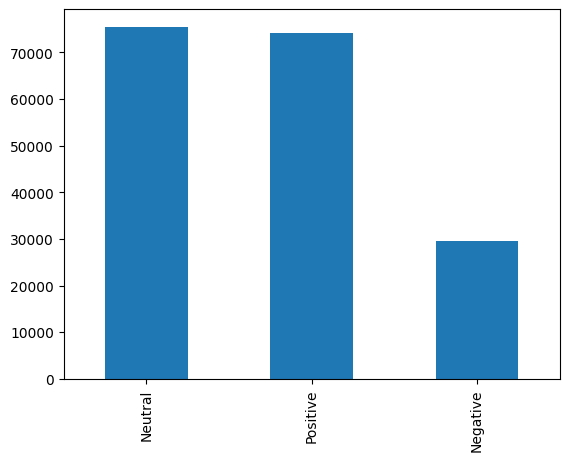

In [146]:
df['sentiment'].value_counts().plot(kind='bar')

**Keyword Extraction**
(for Positive and Negative Sentiments)



In [147]:
positive_tweet = df[df['sentiment'] == 'Positive']['clean_tweet']

In [148]:
neutral_tweet = df[df['sentiment'] == 'Neutral']['clean_tweet']

In [149]:
negative_tweet = df[df['sentiment'] == 'Negative']['clean_tweet']

In [150]:
positive_tweet

1         Hey and  wouldnt it have made more sense to ha...
6         How Will Change Work in General (and recruitin...
8                 Praying for good health and recovery of  
12        👋🏻 — no one will be safe from until everyone i...
13        Lets all protect ourselves from Its real and t...
                                ...                        
179096    We were really bummed we couldn’t cop one of t...
179103    Thanks for nominating me for the challenge I n...
179104                       2020 The year of insanity Lol 
179105     A powerful painting by Juan Lucena Its a trib...
179106    More than 1200 students test positive for at m...
Name: clean_tweet, Length: 74154, dtype: object

In [151]:
#Remove stopwords and coversion to tokens
positive_tweet_list = positive_tweet.apply(nfx.remove_stopwords).tolist()

In [152]:
#Remove stopwords and coversion to tokens
neutral_tweet_list = neutral_tweet.apply(nfx.remove_stopwords).tolist()

In [153]:
#Remove stopwords and coversion to tokens
negative_tweet_list = negative_tweet.apply(nfx.remove_stopwords).tolist()

In [154]:
positive_tweet_list

['Hey wouldnt sense players pay respects A…',
 'Change Work General (and recruiting specifically) via/',
 'Praying good health recovery',
 '👋🏻 — safe safe commit ensure…',
 'Lets protect real numbers climbing fast Continent Lets n…',
 'Second wave Flandersback',
 'COVID Update: infection rate Florida following natural curve experts predicted initial cu…',
 'Good Patriots Volunteer Election Judge Polls open without…',
 'comprehensive review amp Analysis: key ways WASH help reduce transmission…',
 'crosses 2 lakh mark 150055 ppp recovered far positive today 6988/total…',
 'Actor father MrGKReddy tested positive 15/20 days s…',
 'safe place visit guests said hotel meticulous applying hand sanitation als…',
 'CEO live WSU talking “The effects Covid19 students”…',
 'Actionables healthy recovery',
 'understood hadnt missed meeting In…',
 'released new podcast episodes week: Technology Platforms Conduct Telehealth Visits C…',
 'reports 1142 positive cases 29 deaths Saturday Death toll rises 3

**Tokenization**

In [159]:
#list of  positive tokens
pos_tokens = [token for line in positive_tweet_list for token in line.split()]

In [160]:
#list of negative tokens
neg_tokens = [token for line in negative_tweet_list for token in line.split()]

In [161]:
#list of  neutral tokens
neu_tokens = [token for line in neutral_tweet_list for token in line.split()]

In [162]:
pos_tokens

['Hey',
 'wouldnt',
 'sense',
 'players',
 'pay',
 'respects',
 'A…',
 'Change',
 'Work',
 'General',
 '(and',
 'recruiting',
 'specifically)',
 'via/',
 'Praying',
 'good',
 'health',
 'recovery',
 '👋🏻',
 '—',
 'safe',
 'safe',
 'commit',
 'ensure…',
 'Lets',
 'protect',
 'real',
 'numbers',
 'climbing',
 'fast',
 'Continent',
 'Lets',
 'n…',
 'Second',
 'wave',
 'Flandersback',
 'COVID',
 'Update:',
 'infection',
 'rate',
 'Florida',
 'following',
 'natural',
 'curve',
 'experts',
 'predicted',
 'initial',
 'cu…',
 'Good',
 'Patriots',
 'Volunteer',
 'Election',
 'Judge',
 'Polls',
 'open',
 'without…',
 'comprehensive',
 'review',
 'amp',
 'Analysis:',
 'key',
 'ways',
 'WASH',
 'help',
 'reduce',
 'transmission…',
 'crosses',
 '2',
 'lakh',
 'mark',
 '150055',
 'ppp',
 'recovered',
 'far',
 'positive',
 'today',
 '6988/total…',
 'Actor',
 'father',
 'MrGKReddy',
 'tested',
 'positive',
 '15/20',
 'days',
 's…',
 'safe',
 'place',
 'visit',
 'guests',
 'said',
 'hotel',
 'meticulous

In [163]:
#import counter to get most common keywords
from collections import Counter

In [164]:
def get_tokens(docx,num=30):
  word_tokens = Counter(docx)
  most_common = word_tokens.most_common(num)
  result = dict( most_common)
  return result

In [165]:
most_common_pos_words = get_tokens(pos_tokens)

In [166]:
most_common_neg_words = get_tokens(neg_tokens)

In [167]:
most_common_neu_words = get_tokens(neu_tokens)

In [168]:
#plot with seaborn
neg_df = pd.DataFrame(most_common_neg_words.items(),columns=['words','score'])
neg_df

,words,score
0,cases,2245
1,amp,2033
2,people,1801
3,pandemic,895
4,spread,870
5,daily,760
6,like,754
7,COVID19,748
8,slow,734
9,new,723


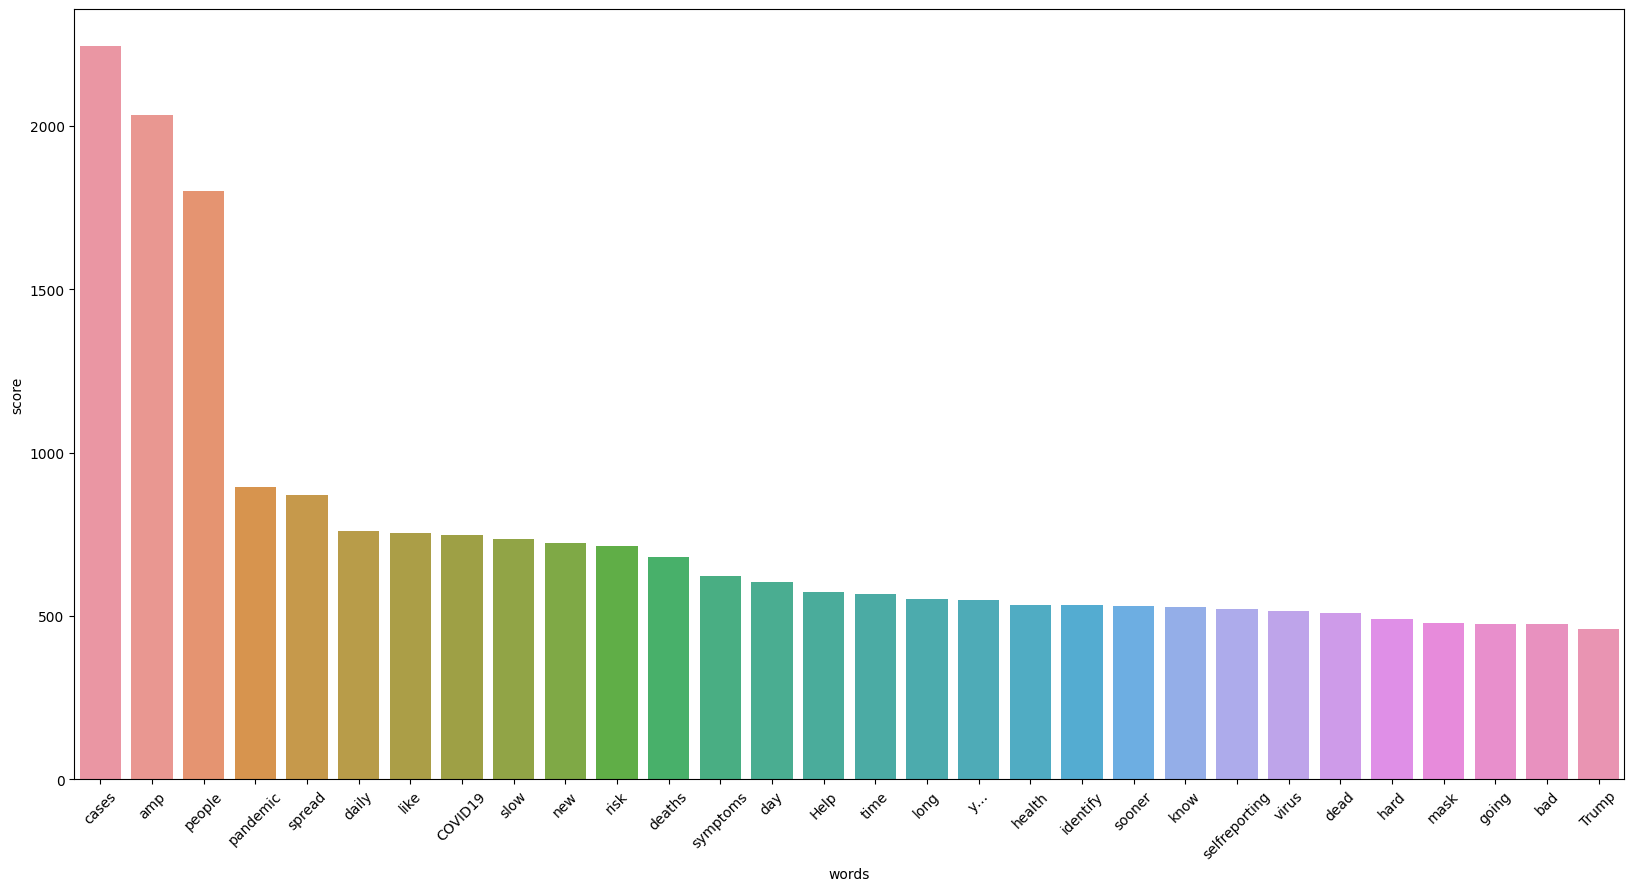

In [169]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'words', y = 'score' , data= neg_df)
plt.xticks(rotation = 45)
plt.show()

In [170]:
#plot with seaborn
neu_df = pd.DataFrame(most_common_neu_words.items(),columns=['words','score'])
neu_df

,words,score
0,amp,4544
1,COVID19,3116
2,cases,2940
3,people,2544
4,pandemic,2110
5,|,1899
6,deaths,1868
7,:,1576
8,2020,1517
9,like,1474


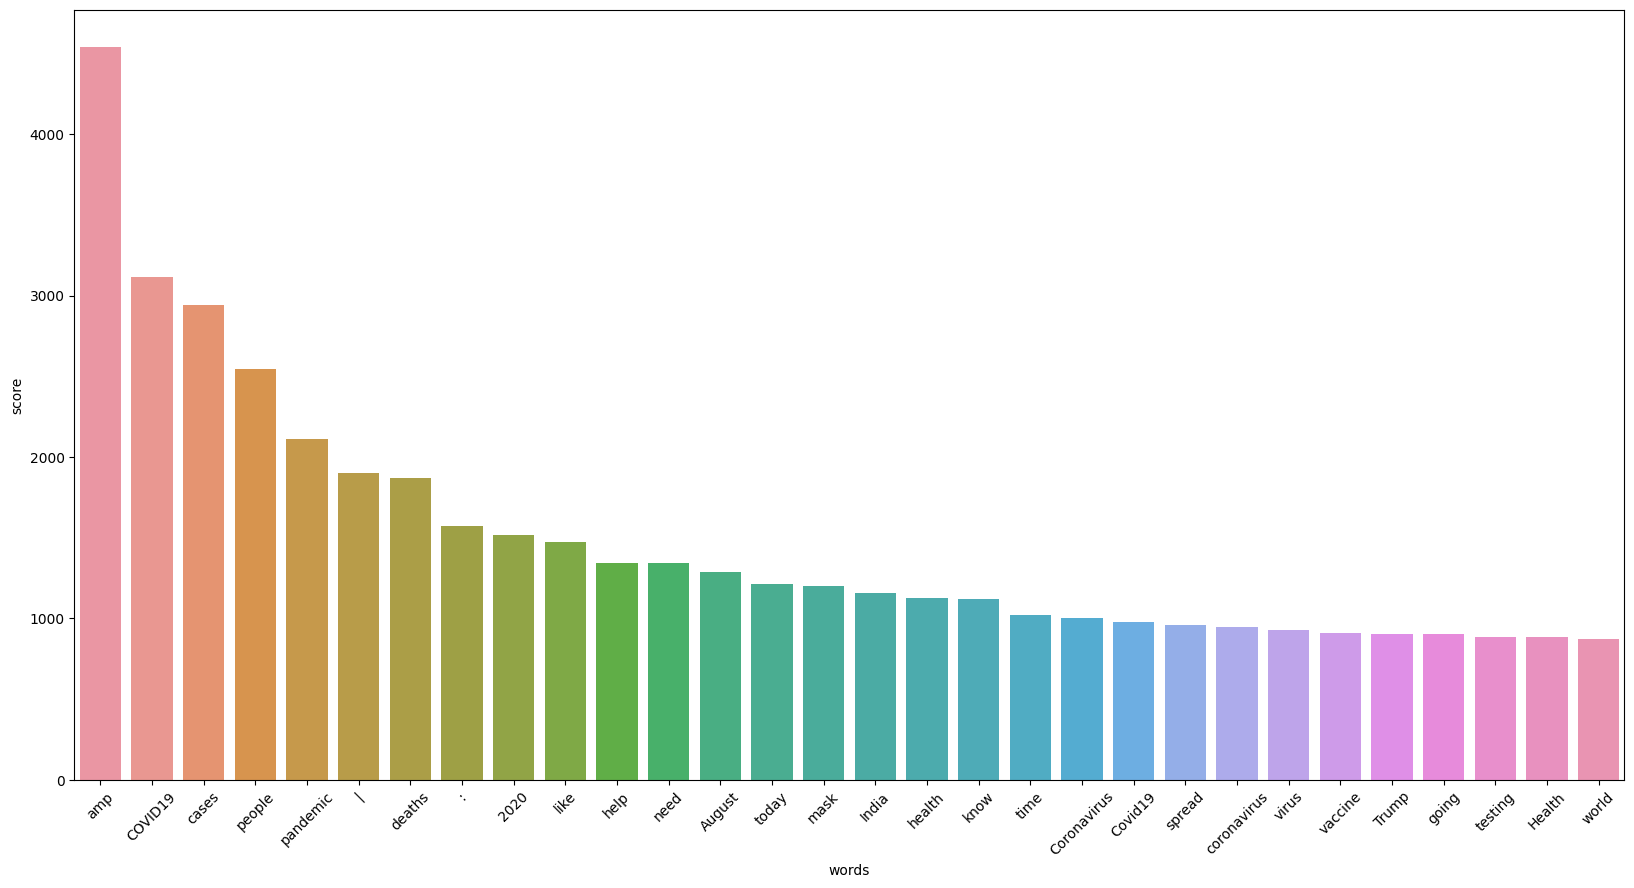

In [171]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'words', y = 'score' , data= neu_df)
plt.xticks(rotation = 45)
plt.show()

In [172]:
#plot with seaborn
pos_df = pd.DataFrame(most_common_pos_words.items(),columns=['words','score'])
pos_df

,words,score
0,cases,10310
1,new,9947
2,amp,5298
3,positive,3888
4,people,3655
5,New,3325
6,deaths,3292
7,COVID19,2745
8,pandemic,1929
9,total,1783


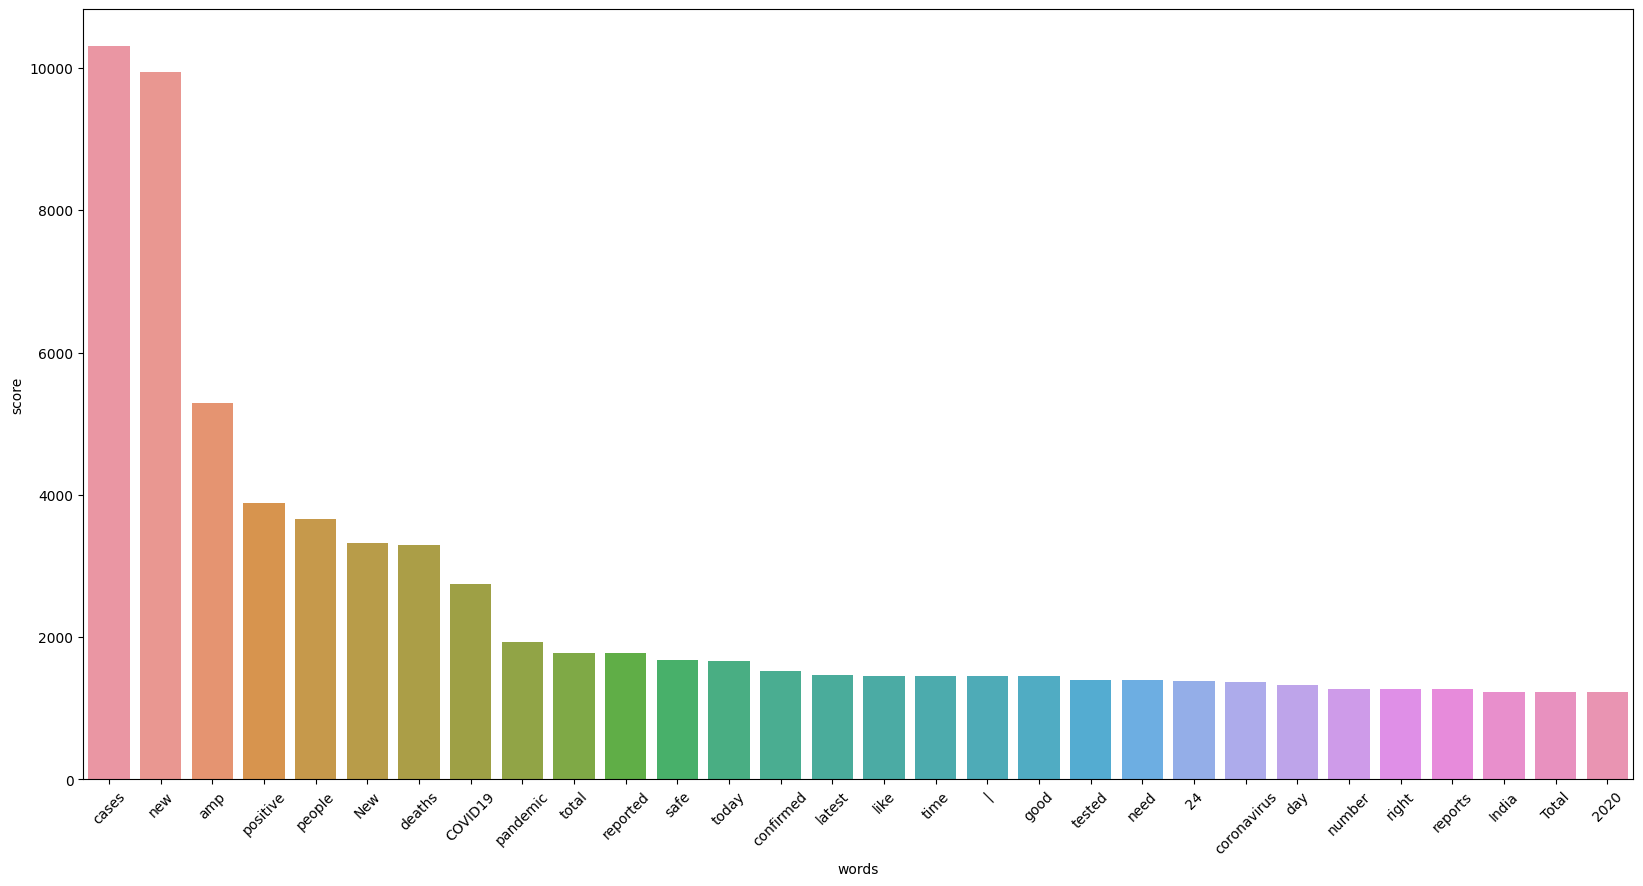

In [173]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'words', y = 'score' , data= pos_df)
plt.xticks(rotation = 45)
plt.show()

In [174]:
#word cloud
from wordcloud import WordCloud

In [179]:
def plot_wordcloud(docx):
  plt.figure(figsize=(20,10))
  mywordcloud = WordCloud().generate(docx)
  plt.imshow(mywordcloud,interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [180]:
pos_docx = ' '.join(pos_tokens)

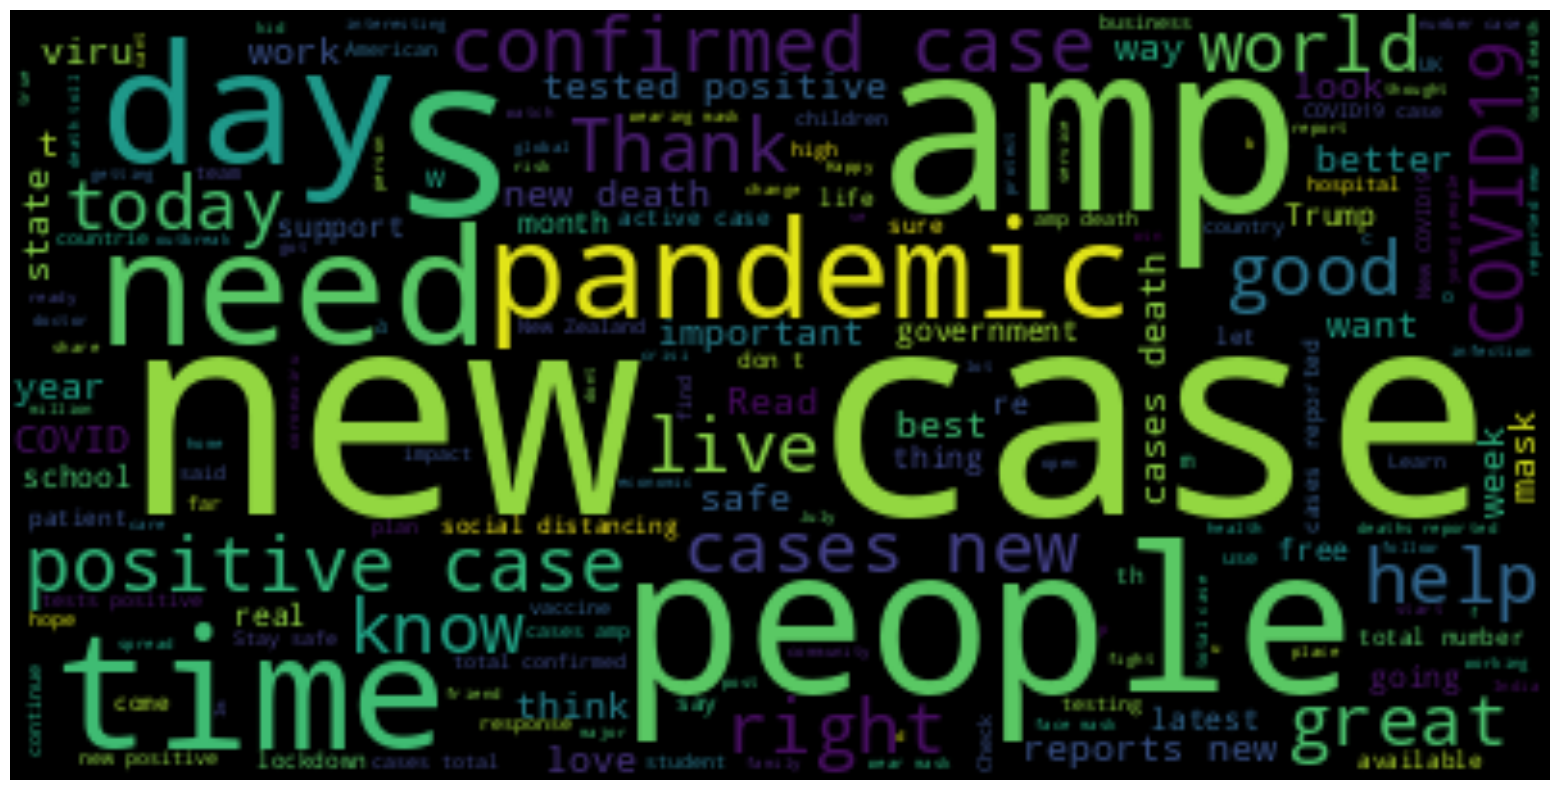

In [181]:
plot_wordcloud(pos_docx)

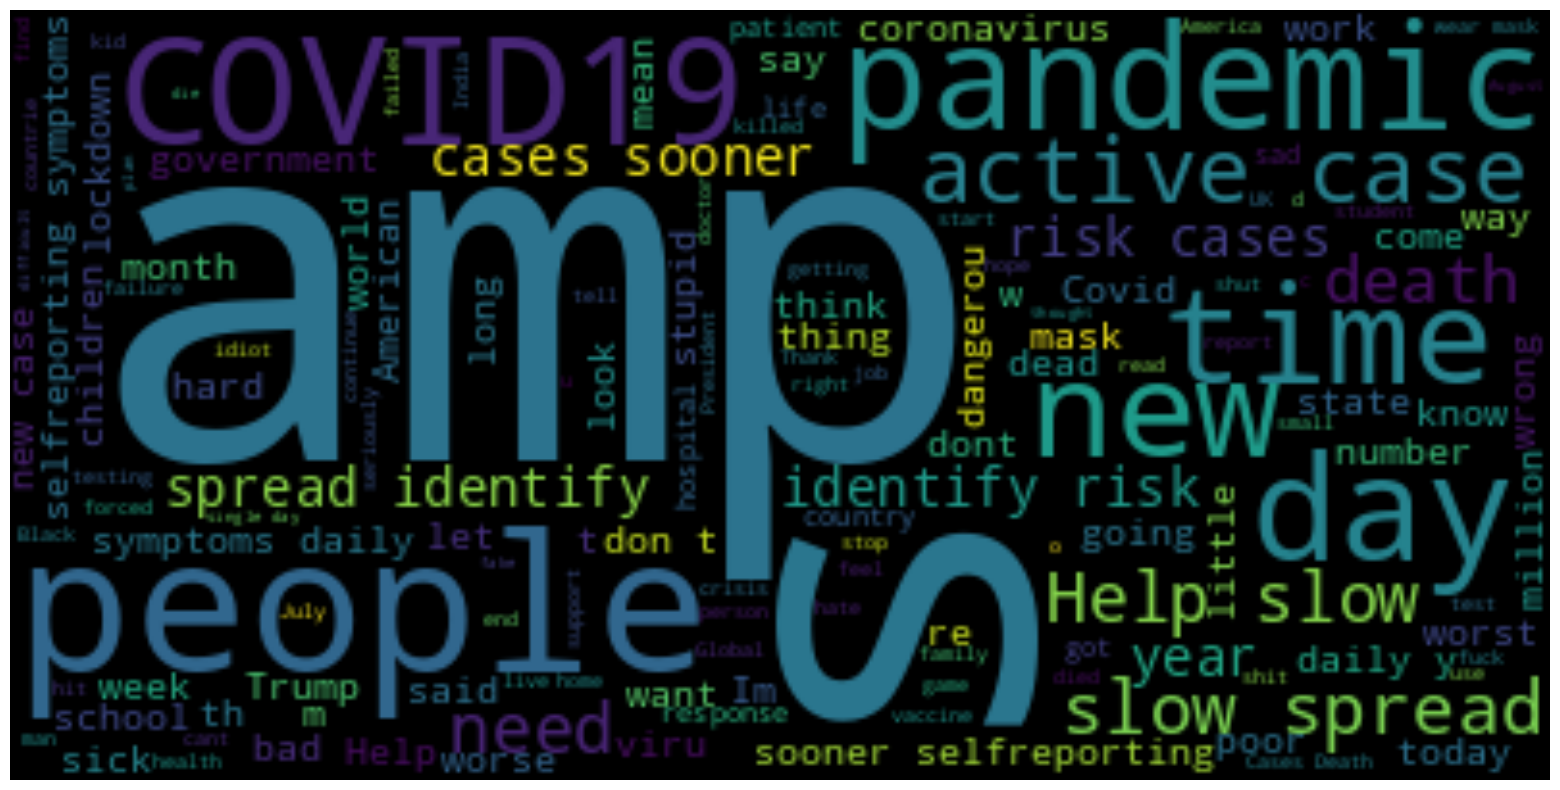

In [183]:
neg_docx = ' '.join(neg_tokens)
plot_wordcloud(neg_docx)

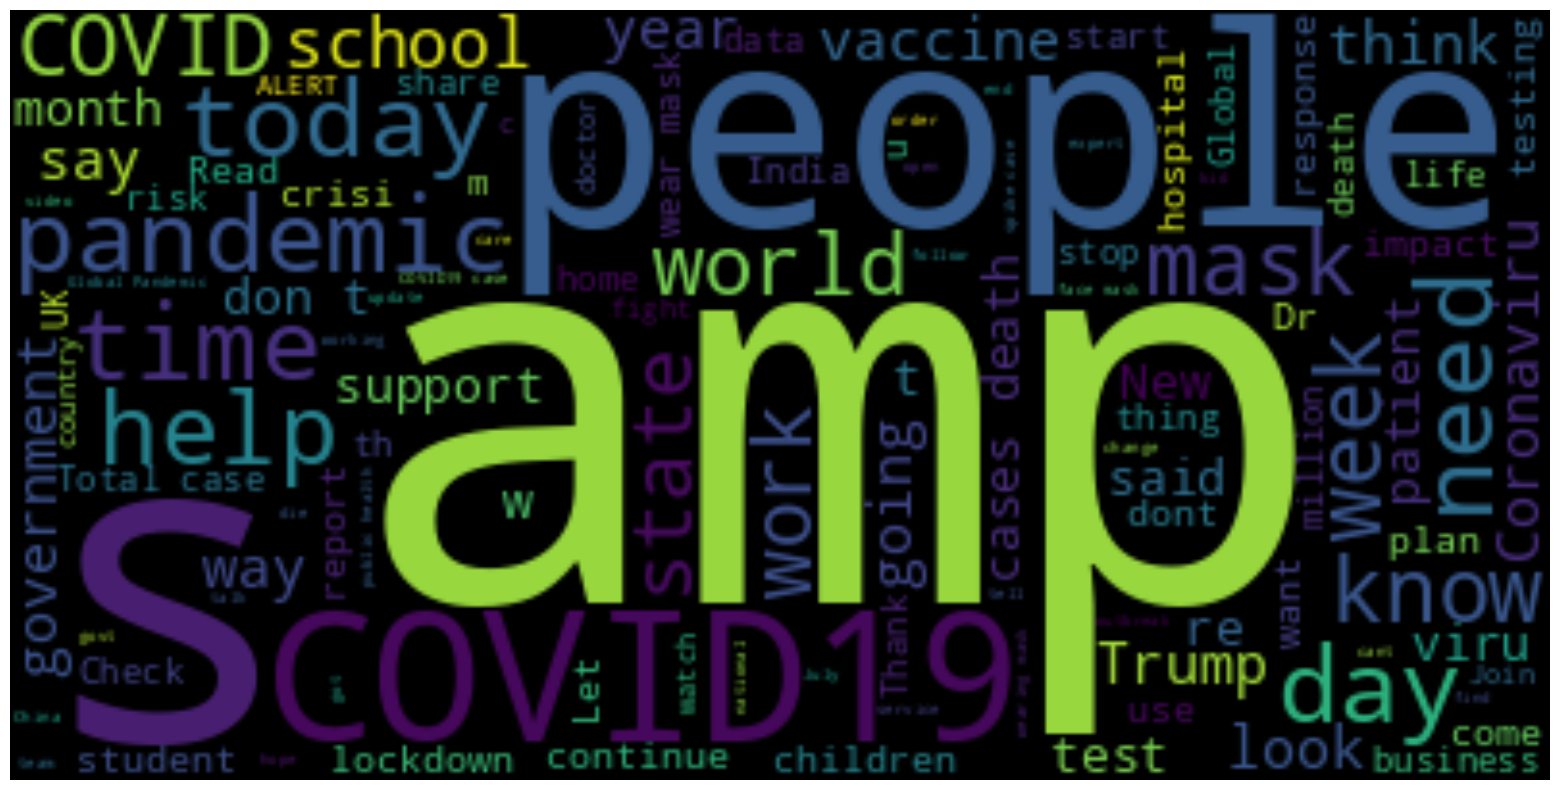

In [184]:
neu_docx = ' '.join(neu_tokens)
plot_wordcloud(neu_docx)